In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing,decomposition
from scipy import stats
import json
import ast
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

# Data Loading

In [2]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll_PFE\Payroll Fraud Detection\1. Data Cleaning\Timesheet\Timesheet_data\csv\ZX_Timesheet_V5.csv")
df = df.drop(df.columns[0], axis=1)

df['DEBACQ'] = pd.to_datetime(df['DEBACQ'])
df['FINACQ'] = pd.to_datetime(df['FINACQ'])

df['DATDEB'] = pd.to_datetime(df['DATDEB'])
df['DATFIN'] = pd.to_datetime(df['DATFIN'])

df['DEBABS'] = pd.to_datetime(df['DEBABS'])
df['FINABS'] = pd.to_datetime(df['FINABS'])

df['DTUPD1'] = pd.to_datetime(df['DTUPD1'])

df['TILOAD'] = pd.to_datetime(df['TILOAD'])
df['ANNEE_REF'] = pd.to_datetime(df['ANNEE_REF'])

In [21]:
df1['PERPAI'] = df5['PERPAI']
df222['PERPAI'] = df5['PERPAI']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_62160\466669139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['PERPAI'] = df5['PERPAI']


In [5]:
dffp = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll\3. Data related\1. Data\Post-cleaning versions\Timesheet\ZX_Timesheet_V1.csv")
dffp = dffp.drop(dffp.columns[0], axis=1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_43328\2883549822.py:1: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  dffp = pd.read_csv(r"C:\Users\LENOVO\Desktop\Payroll\3. Data related\1. Data\Post-cleaning versions\Timesheet\ZX_Timesheet_V1.csv")


In [3]:
df0 = df.iloc[:,:]

In [4]:
n,p = df0.shape

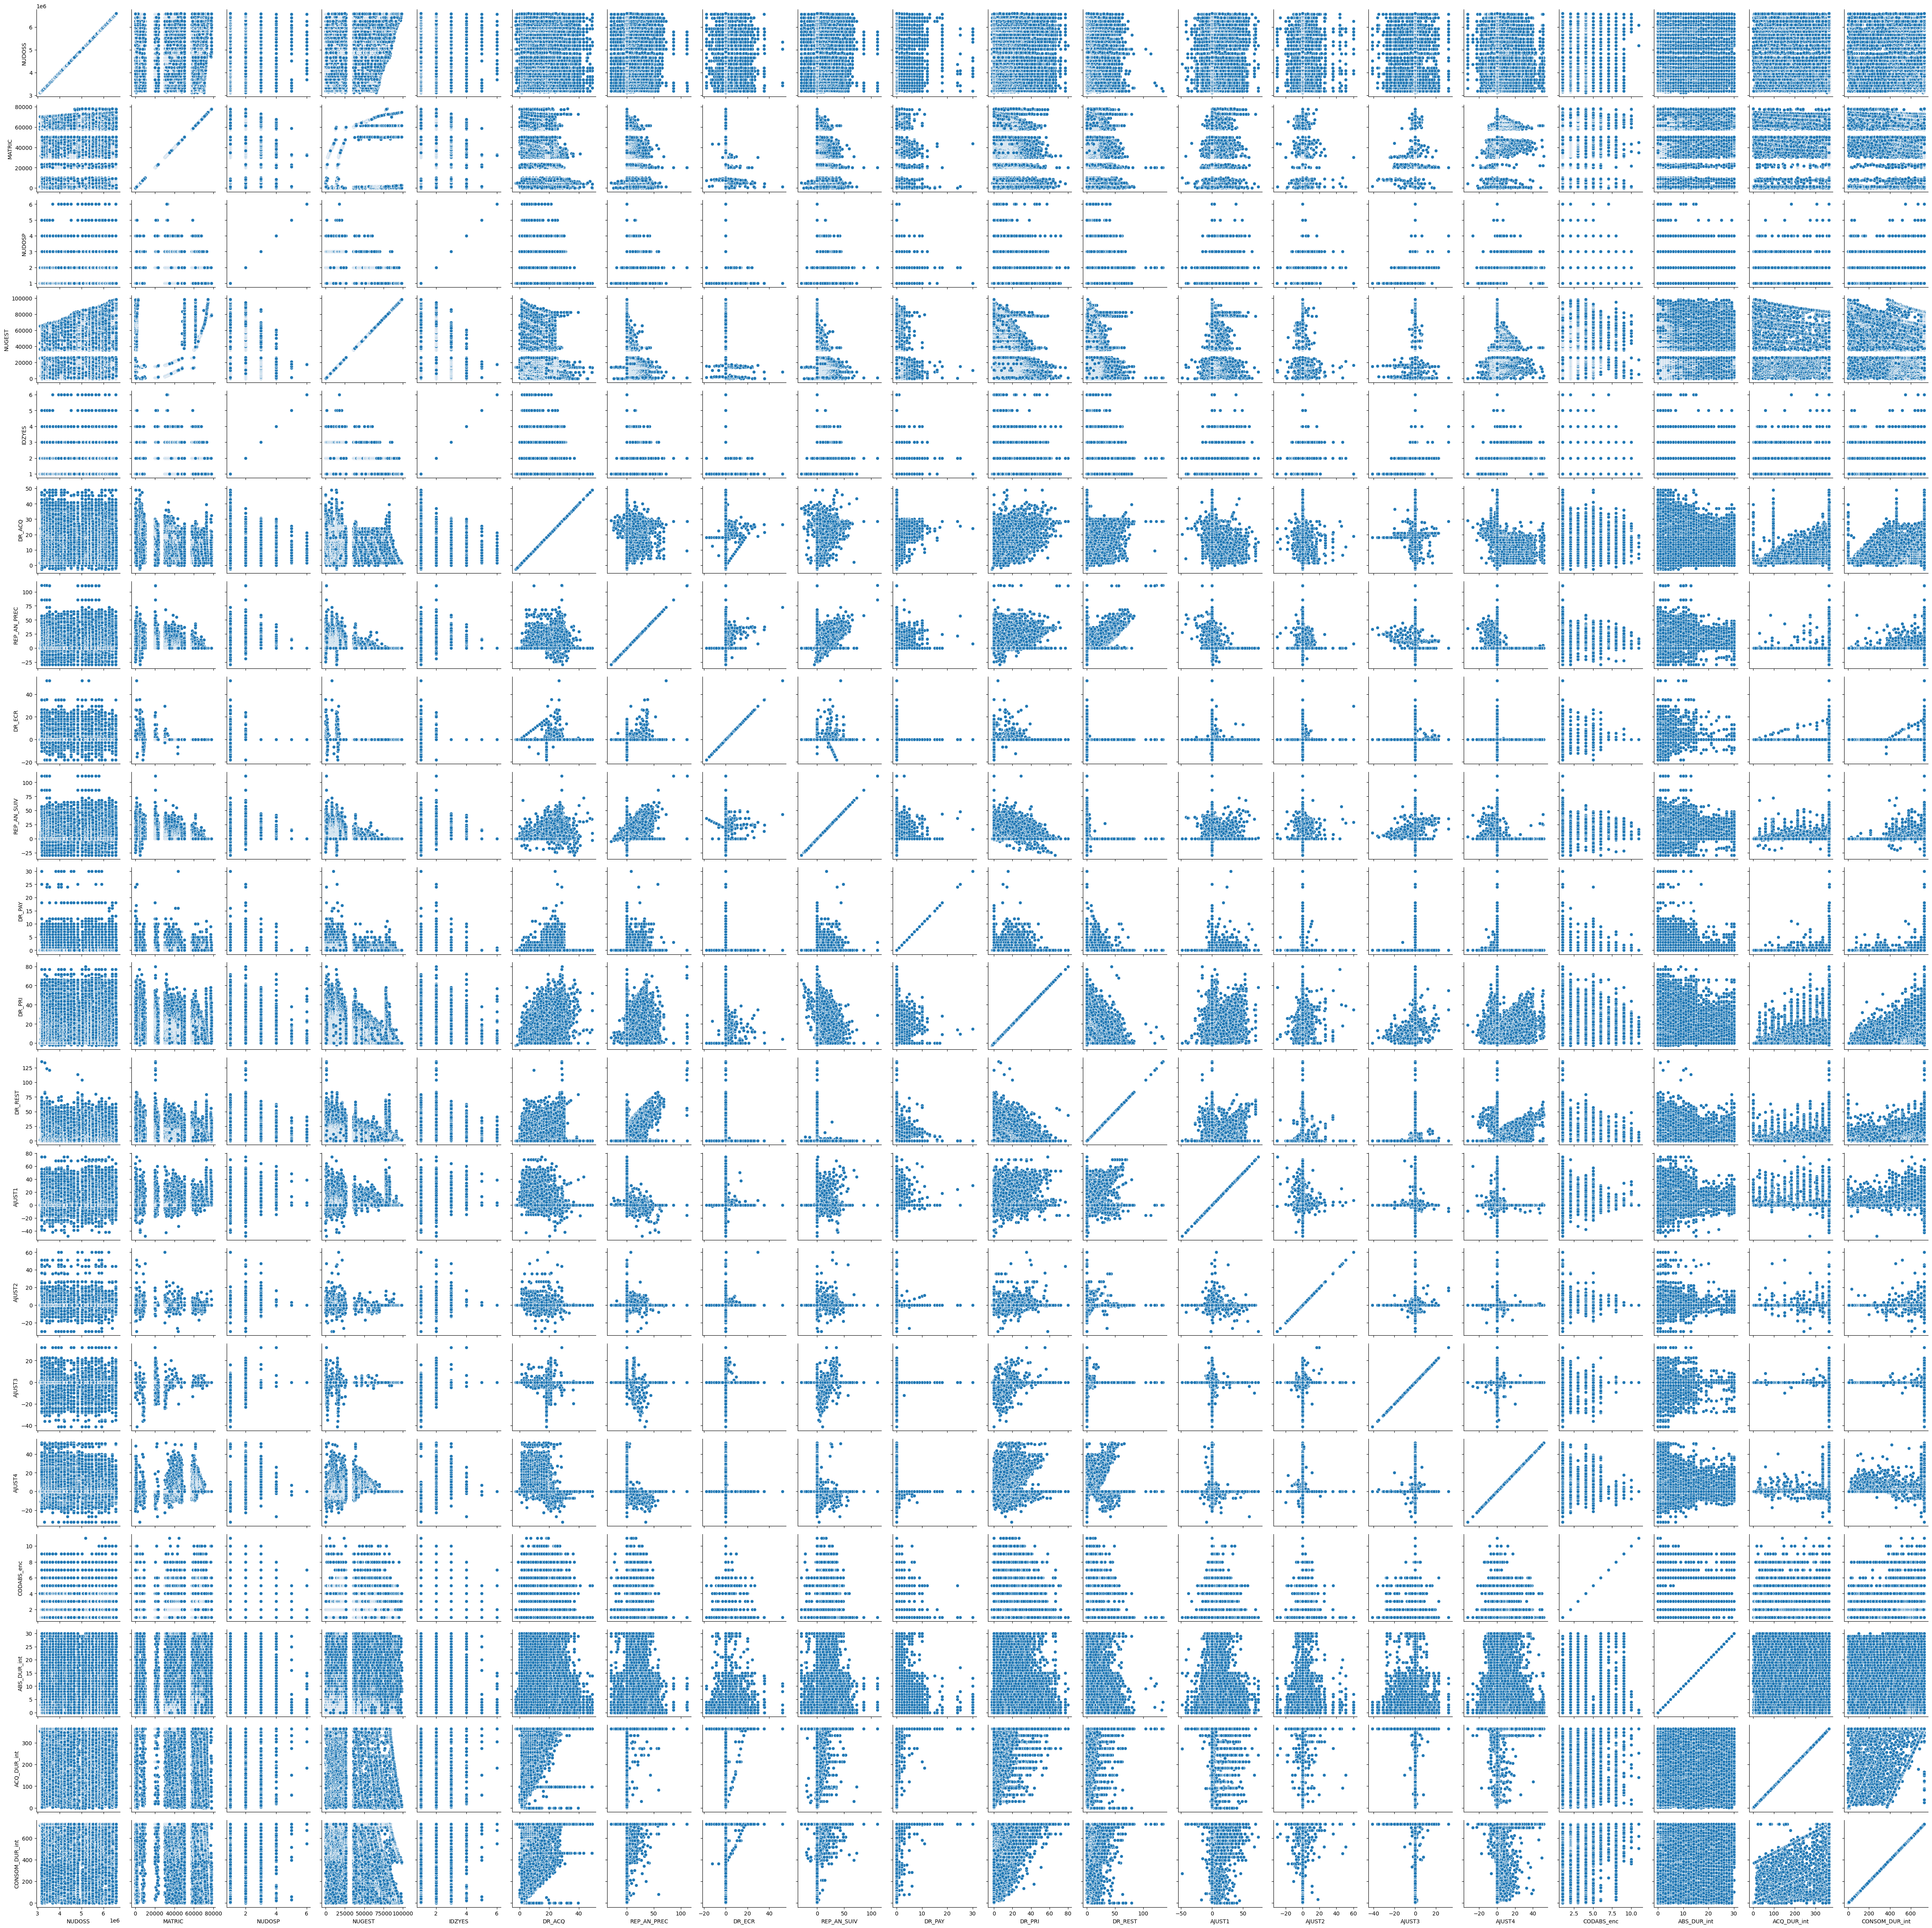

In [134]:
g = sns.PairGrid(df0)
g.map(sns.scatterplot)

**Interpretation**

Linear relationship between : 
- DR_REST & REP_AN_PREC
- & REP_AN_SUIV & REP_AN_PREC
- DR_REST & AJUST4 (for positive values of AJUST4), small pente

Linear (en X + X**3) : 
-  AJUST4 & REP_AN_SUIV


In [6]:
cols_all = df0.columns

cols_Date = []
cols_numeric = []
cols_obj = []
cols_bool = []
for col_name in cols_all:
    col_type = df0[col_name].dtype
    if col_type == 'datetime64[ns]':
        cols_Date.append(col_name)
    elif col_type in ['int64', 'int32', 'float64','float32']:
        cols_numeric.append(col_name)
    elif col_type == 'object':
        cols_obj.append(col_name)
    elif col_type == 'bool':
        cols_bool.append(col_name)

In [7]:
cols_numeric_id = ['NUDOSS','MATRIC','NUDOSP','NUGEST','IDZYES']
cols_ajust = ['AJUST1','AJUST2','AJUST3','AJUST4']
cols_num_no_ids = [col for col in cols_numeric if col not in cols_numeric_id + cols_ajust]

In [8]:
cols_MAT_PER = ['MATRIC','PERPAI']
motif_cols = ['MOTIF1','MOTIF2','MOTIF3','MOTIF4']
cols_obj_remain = [col for col in cols_obj if col not in motif_cols+cols_MAT_PER]

In [9]:
df_new = df0[cols_num_no_ids+cols_Date+cols_bool+cols_obj]

In [10]:
df = df0[cols_num_no_ids + cols_Date]
df1 = df0[cols_num_no_ids]

## Corr matrix

In [18]:
corr_matrix = df1.corr()

## SAVING

In [22]:
df1.to_csv("TimeSheet_acp.csv",sep=',',na_rep='NaN')
df222.to_csv("TimeSheet_acp_restreint.csv",sep=',',na_rep='NaN')

## Normalized df : Numerals & Dates

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()
# sc = StandardScaler()

# Fit and transform the data
df[cols_num_no_ids ] = scaler.fit_transform(df[cols_num_no_ids])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24612\3326511673.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_num_no_ids ] = scaler.fit_transform(df[cols_num_no_ids])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22132\1052724505.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


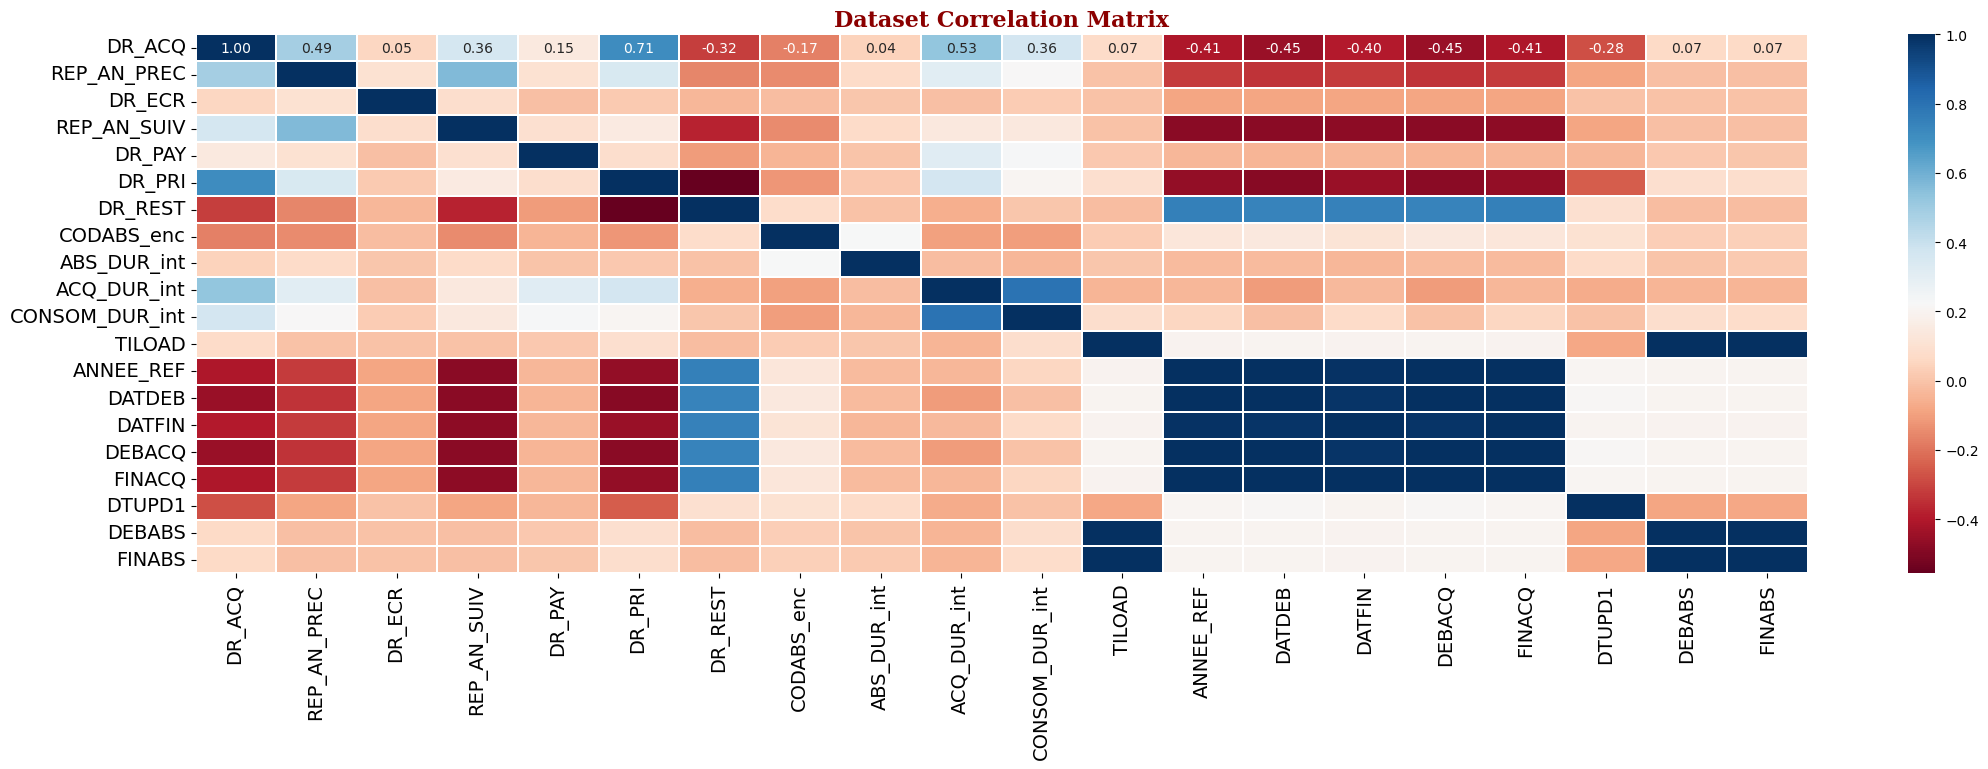

In [21]:
# plot correlation matrix heatmap
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}

fig, ax = plt.subplots(figsize=[26,7])
sns.heatmap(df.corr('spearman'), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu') #kind of correlation->  ‘pearson’, ‘kendall’, ‘spearman’
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict=axtitle_dict)
plt.savefig('correlation_matrix_Timesheet_num_date.png')
fig.show()

**Coorelation Matrix Interpretation**

Negatively correlated with DATEDEB - DATFIN - DEBACQ - FINACQ - ANNEE_REF : 
- Medium++ : REP_AN_SUIV
- Low+ : REP_AN_PREC

Negatively correlated with DATEDEB - DATFIN - DEBACQ - FINACQ - ANNEE_REF & DTUPD1 : 
- Medium++ : DR_PRI
- Medium+ : DR_ACQ

Negatively correlated with DR_REST : 
- Highly : DR_PRI 
- Medium : REP_AN_SUIV
- Weak : DR_ACQ
- Weakk- : REP_AN_PREC


Positively correlated : 
- Very Highly +++ : CONSOM_DUR_int & ACQ_DUR_int
- Highly++ : DR_REST & (DATEDEB - DATFIN - DEBACQ - FINACQ - ANNEE_REF)
- Medium : DR_PRI & DR_ACQ

In [11]:
df222 = df.drop(['DATFIN', 'DEBACQ','FINACQ','ANNEE_REF','FINABS'],axis=1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24612\1362839351.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


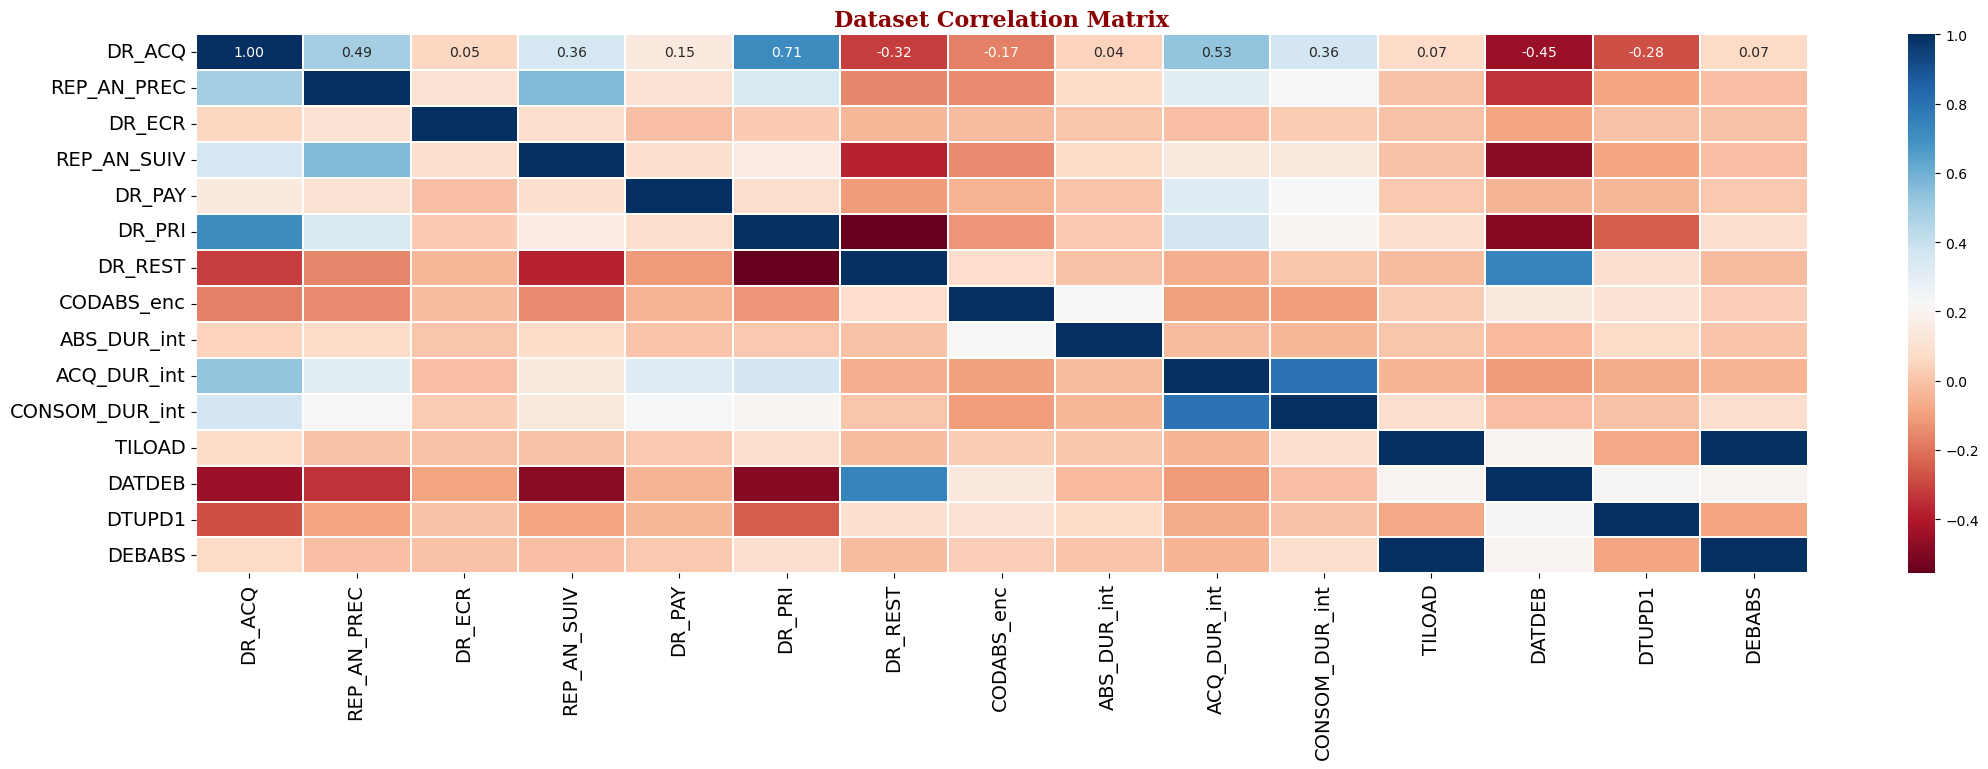

In [26]:
# plot correlation matrix heatmap
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}

fig, ax = plt.subplots(figsize=[26,7])
sns.heatmap(df222.corr('spearman'), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu') #kind of correlation->  ‘pearson’, ‘kendall’, ‘spearman’
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict=axtitle_dict)
plt.savefig('correlation_matrix_Timesheet_num_date.png')
fig.show()

## Normalized df1 : Numerals 

In [102]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data
df1[cols_num_no_ids] = scaler.fit_transform(df1[cols_num_no_ids])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21536\1336190996.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[cols_num_no_ids] = scaler.fit_transform(df1[cols_num_no_ids])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21536\3505610228.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


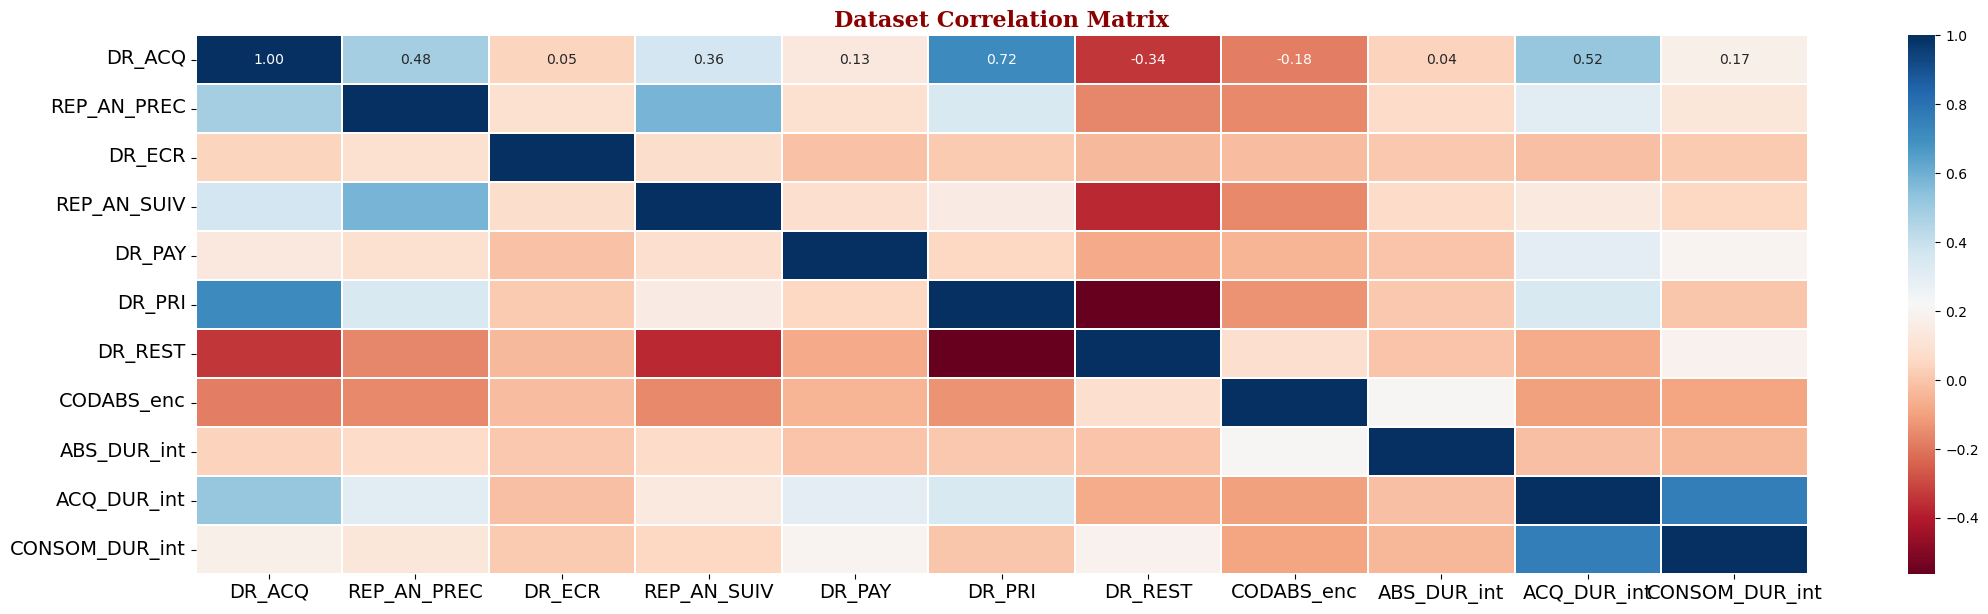

In [103]:
# plot correlation matrix heatmap
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}

fig, ax = plt.subplots(figsize=[26,7])
sns.heatmap(df1.corr('spearman'), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu') #kind of correlation->  ‘pearson’, ‘kendall’, ‘spearman’
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix', fontdict=axtitle_dict)
plt.savefig('correlation_matrix_Timesheet_num_1.png')
fig.show()

In [23]:
data_cr = preprocessing.scale(df1[cols_num_no_ids])

In [24]:
#indices_null = np.where(np.isnan(data_cr))
#indices_null

In [109]:
print (f' Mean : {np.nanmean(data_cr, axis=0)} \n\n Std : {np.nanstd(data_cr,axis=0)}')

 Mean : [-6.59869685e-16 -2.57360342e-15  1.18759097e-14 -4.96856192e-16
  1.47940327e-17 -5.81154265e-16 -4.60568942e-17 -1.13746572e-16
 -8.29024096e-17 -8.55541702e-16 -1.98826217e-15] 

 Std : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## ACP

In [25]:
PCA = decomposition.PCA(n_components= len(df1.columns))
PCA.fit(df1)

PCA(n_components=11)

In [26]:
n_compo = PCA.n_components_

In [27]:
eigval = PCA.explained_variance_

In [28]:
PCA.explained_variance_ratio_

array([9.05919978e-01, 8.08596955e-02, 5.91327306e-03, 3.06806341e-03,
       1.78637655e-03, 1.29553378e-03, 8.56193847e-04, 2.24654965e-04,
       3.65288850e-05, 2.50913284e-05, 1.46112001e-05])

In [29]:
eigval.shape

(11,)

## Visualization

### a. Scree plot

In [30]:
n,p = df1.shape

In [31]:
p

11

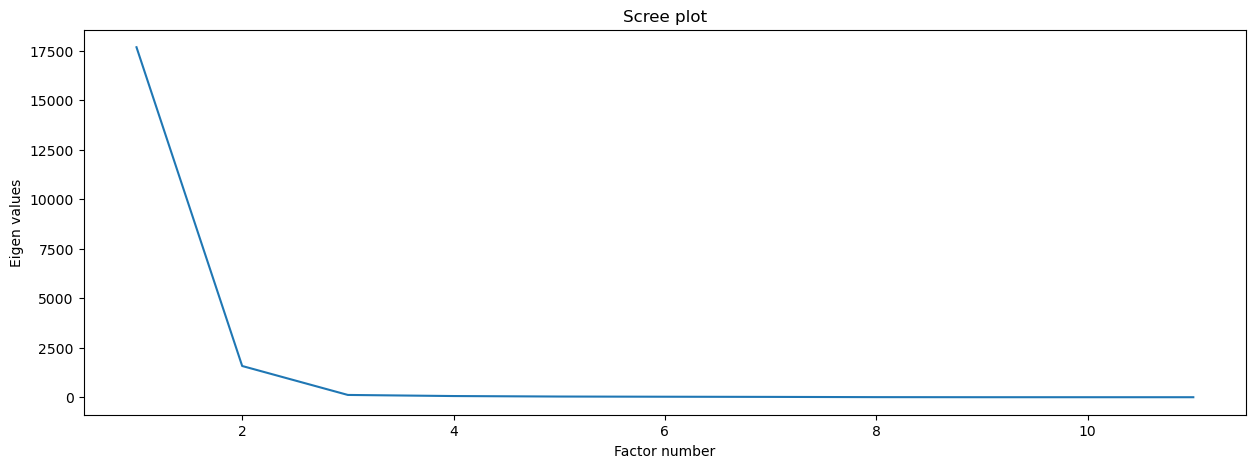

In [32]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(1,n_compo+1),eigval)

plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.savefig('Scree_plot_Timesheet_11.png')

plt.show()

### b. Cumul Explained variance 

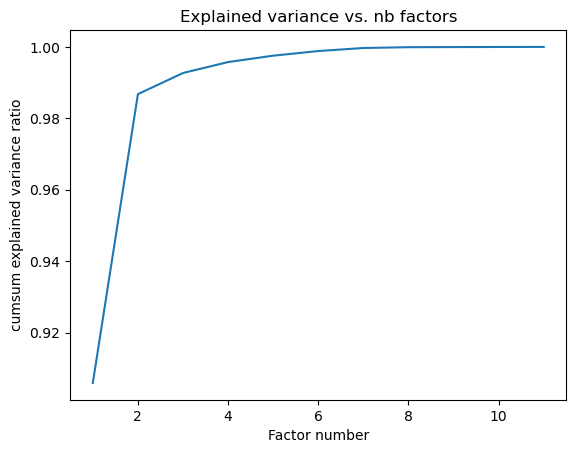

In [33]:
plt.plot(np.arange(1,n_compo+1),np.cumsum(PCA.explained_variance_ratio_))

plt.title("Explained variance vs. nb factors")
plt.ylabel("cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.savefig('Cumul_plot_Timesheet_11.png')
#plt.style.context('seaborn-whitegrid')
#plt.axhline(y=80, color='r', linestyle='--')
plt.show()

**==> 2 values are enough to represent 98% of the information**

In [34]:
corvar = np.zeros((n_compo,n_compo)) 
for k in range(n_compo):
    corvar[:,k] = PCA.components_[k,:] * np.sqrt(eigval)[k]
    
corvar.shape

(11, 11)

In [35]:
corvar

array([[-3.77102417e+00,  7.28137731e-01,  4.23086988e+00,
        -4.40709540e-02,  1.38942269e+00,  6.72780454e-02,
        -3.16352292e+00, -9.10034686e-01,  5.04150572e-03,
        -1.01023383e-02, -8.45070106e-03],
       [-1.04308162e+00,  1.63699145e-01,  3.85253487e+00,
         4.44074909e+00,  1.32472542e+00, -2.77019033e-01,
         2.09667305e+00, -9.92076451e-01,  3.22522868e-04,
        -2.05374372e-02, -9.45141692e-03],
       [-2.15755888e-03, -6.10854717e-03,  4.31418732e-02,
         8.11388603e-02, -1.05705072e-02, -3.23953462e-03,
         2.31494112e-02, -9.01495084e-02, -1.74719407e-03,
         6.97684311e-01,  3.41751797e-02],
       [-6.58489289e-01, -2.71288418e-02,  2.96594766e+00,
         5.04253953e+00, -2.36636193e+00, -8.94745815e-02,
        -1.12170865e+00,  1.07306959e+00,  9.23074155e-03,
         1.02297018e-02,  3.29244468e-03],
       [-3.34248361e-02,  5.44523082e-03,  6.56224942e-02,
         5.11101131e-02, -9.90298162e-03, -4.17029302e-03,
  

In [36]:
pd.DataFrame({'id':df1.columns, 'COR_1':corvar[:,0], 'COR_2':corvar[:,1], 'COR_3':corvar[:,2],
              'COR_4':corvar[:,3],'COR_5':corvar[:,4],'COR_6':corvar[:,5],'COR_7':corvar[:,6],
             'COR_8':corvar[:,7],'COR_9':corvar[:,8],'COR_10':corvar[:,9],'COR_11':corvar[:,10],
             })

id       COR_1      COR_2     COR_3     COR_4     COR_5  \
0           DR_ACQ   -3.771024   0.728138  4.230870 -0.044071  1.389423   
1      REP_AN_PREC   -1.043082   0.163699  3.852535  4.440749  1.324725   
2           DR_ECR   -0.002158  -0.006109  0.043142  0.081139 -0.010571   
3      REP_AN_SUIV   -0.658489  -0.027129  2.965948  5.042540 -2.366362   
4           DR_PAY   -0.033425   0.005445  0.065622  0.051110 -0.009903   
5           DR_PRI   -3.084141   0.183149  8.033769 -3.185099  1.331648   
6          DR_REST   -0.764902   0.685139 -3.024592  2.111980  4.874433   
7       CODABS_enc    0.142383   0.128809 -0.055542 -0.023262 -0.002188   
8      ABS_DUR_int    0.541704   0.673365  0.256560  0.345519  0.156838   
9      ACQ_DUR_int  -80.256963  31.631001 -0.265509 -0.030395 -0.158283   
10  CONSOM_DUR_int -105.902472 -24.005225 -0.216730  0.028733 -0.001041   

       COR_6     COR_7     COR_8     COR_9    COR_10    COR_11  
0   0.067278 -3.163523 -0.910035  0.005042 -0.010102 -0.008451  
1  -0.277019  2.096673 -0.992076  0.000323 -0.020537 -0.009451  
2  -0.003240  0.023149 -0.090150 -0.001747  0.697684  0.034175  
3  -0.089475 -1.121709  1.073070  0.009231  0.010230  0.003292  
4  -0.004170 -0.012103 -0.051319 -0.009926 -0.045622  0.532679  
5  -0.074588  0.900267  0.865530  0.003762  0.012348  0.005619  
6  -0.129255 -0.460439  0.812976  0.004607  0.011478  0.006206  
7   0.437664  0.040923 -0.014043  0.841053  0.000750  0.006300  
8   4.997683  0.137214  0.011583 -0.073402  0.000012 -0.000192  
9  -0.052220  0.076822  0.004817 -0.001147  0.000133 -0.000016  
10  0.069723  0.018621  0.000834  0.001245 -0.000044  0.000016

## Correlation circle

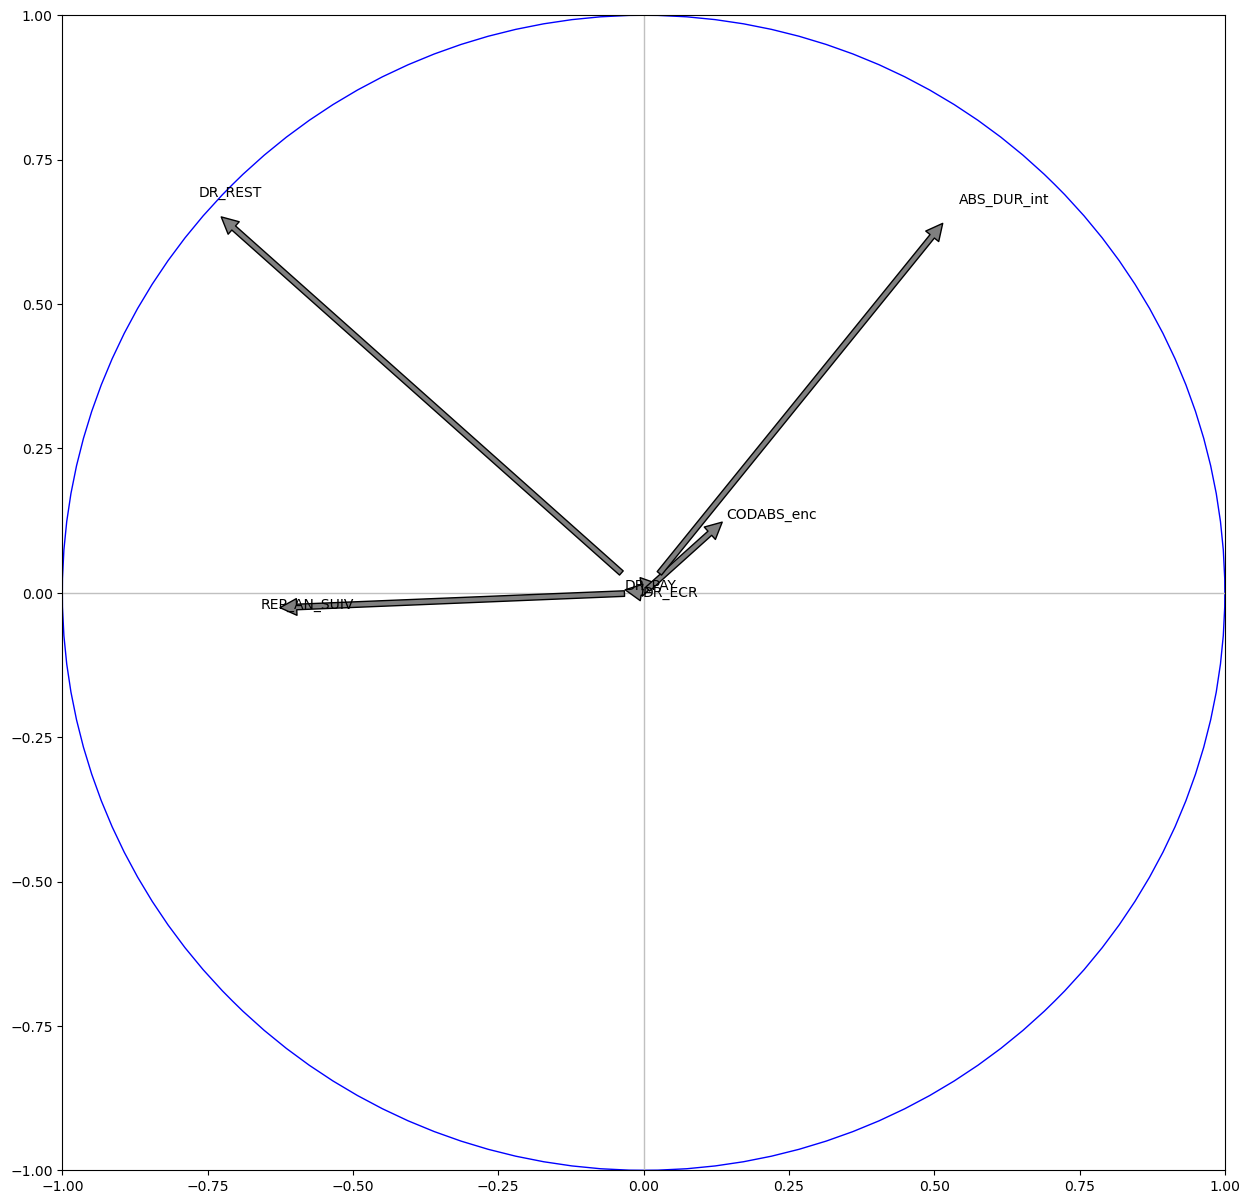

In [44]:
fig,axes = plt.subplots(figsize=(15,15))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# Annotating axes with arrows
for j in range(p): 
    plt.annotate('', xy=(corvar[j,0], corvar[j,1]), xytext=(0, 0),
                 arrowprops=dict(facecolor='grey', shrink=0.05))

# Annotating axes
for j in range(p): 
    plt.annotate(df1.columns[j], (corvar[j,0],corvar[j,1]) )
    
# plotting axes & cercle
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

circle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(circle)
plt.savefig('Corr_Circle_Timesheet_1.png')

plt.show()

**Interpretation**
- ABS_DUR_int & DR_REST are independant
- CODABS_enc & ABS_DUR_int are highly positively correlated
- DR_REST & REP_AN_SUIV are slightly correlated

## Representation Quality of variables

In [38]:
cos2var = corvar**2
pd.DataFrame({'id':df1.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1], 'COS2_3':cos2var[:,2],
              'COS2_4':cos2var[:,3],'COS2_5':cos2var[:,4],'COS2_6':cos2var[:,5],'COS2_7':cos2var[:,6],
             'COS2_8':cos2var[:,7],'COS2_9':cos2var[:,8],'COS2_10':cos2var[:,9],'COS2_11':cos2var[:,10]
             })

id        COS2_1       COS2_2     COS2_3     COS2_4  \
0           DR_ACQ     14.220623     0.530185  17.900260   0.001942   
1      REP_AN_PREC      1.088019     0.026797  14.842025  19.720252   
2           DR_ECR      0.000005     0.000037   0.001861   0.006584   
3      REP_AN_SUIV      0.433608     0.000736   8.796846  25.427205   
4           DR_PAY      0.001117     0.000030   0.004306   0.002612   
5           DR_PRI      9.511928     0.033544  64.541450  10.144854   
6          DR_REST      0.585075     0.469416   9.148156   4.460459   
7       CODABS_enc      0.020273     0.016592   0.003085   0.000541   
8      ABS_DUR_int      0.293444     0.453420   0.065823   0.119384   
9      ACQ_DUR_int   6441.180060  1000.520195   0.070495   0.000924   
10  CONSOM_DUR_int  11215.333648   576.250851   0.046972   0.000826   

       COS2_5     COS2_6     COS2_7        COS2_8        COS2_9       COS2_10  \
0    1.930495   0.004526  10.007877  8.281631e-01  2.541678e-05  1.020572e-04   
1    1.754897   0.076740   4.396038  9.842157e-01  1.040210e-07  4.217863e-04   
2    0.000112   0.000010   0.000536  8.126934e-03  3.052687e-06  4.867634e-01   
3    5.599669   0.008006   1.258230  1.151478e+00  8.520659e-05  1.046468e-04   
4    0.000098   0.000017   0.000146  2.633623e-03  9.851690e-05  2.081383e-03   
5    1.773287   0.005563   0.810480  7.491413e-01  1.415216e-05  1.524660e-04   
6   23.760099   0.016707   0.212004  6.609299e-01  2.122608e-05  1.317556e-04   
7    0.000005   0.191550   0.001675  1.972121e-04  7.073695e-01  5.630062e-07   
8    0.024598  24.976838   0.018828  1.341618e-04  5.387865e-03  1.534246e-10   
9    0.025053   0.002727   0.005902  2.320502e-05  1.316624e-06  1.779853e-08   
10   0.000001   0.004861   0.000347  6.949870e-07  1.550354e-06  1.931075e-09   

         COS2_11  
0   7.141435e-05  
1   8.932928e-05  
2   1.167943e-03  
3   1.084019e-05  
4   2.837469e-01  
5   3.156856e-05  
6   3.851030e-05  
7   3.968411e-05  
8   3.695393e-08  
9   2.417715e-10  
10  2.413928e-10

## Contributions

In [39]:
ctrvar = cos2var

for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]

In [40]:
pd.DataFrame({'id':df1.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'CTR_3':ctrvar[:,2],
              'CTR_4':ctrvar[:,3],'CTR_5':ctrvar[:,4],'CTR_6':ctrvar[:,5],'CTR_7':ctrvar[:,6],
             'CTR_8':ctrvar[:,7],'CTR_9':ctrvar[:,8],'CTR_10':ctrvar[:,9],'CTR_11':ctrvar[:,10]
             })

id         CTR_1         CTR_2     CTR_3     CTR_4  \
0           DR_ACQ  8.042125e-04  3.359209e-04  0.155086  0.000032   
1      REP_AN_PREC  6.153027e-05  1.697863e-05  0.128590  0.329299   
2           DR_ECR  2.632555e-10  2.364209e-08  0.000016  0.000110   
3      REP_AN_SUIV  2.452165e-05  4.663076e-07  0.076215  0.424596   
4           DR_PAY  6.318162e-08  1.878636e-08  0.000037  0.000044   
5           DR_PRI  5.379238e-04  2.125295e-05  0.559182  0.169404   
6          DR_REST  3.308750e-05  2.974182e-04  0.079259  0.074483   
7       CODABS_enc  1.146489e-06  1.051245e-05  0.000027  0.000009   
8      ABS_DUR_int  1.659498e-05  2.872835e-04  0.000570  0.001994   
9      ACQ_DUR_int  3.642652e-01  6.339220e-01  0.000611  0.000015   
10  CONSOM_DUR_int  6.342557e-01  3.651081e-01  0.000407  0.000014   

           CTR_5         CTR_6     CTR_7         CTR_8         CTR_9  \
0   5.536532e-02  1.789946e-04  0.598842  1.888608e-01  3.564726e-05   
1   5.032929e-02  3.034677e-03  0.263046  2.244483e-01  1.458904e-07   
2   3.204503e-06  4.150100e-07  0.000032  1.853330e-03  4.281421e-06   
3   1.605948e-01  3.165867e-04  0.075289  2.625922e-01  1.195030e-04   
4   2.812555e-06  6.877434e-07  0.000009  6.005920e-04  1.381708e-04   
5   5.085668e-02  2.200061e-04  0.048497  1.708401e-01  1.984853e-05   
6   6.814238e-01  6.606797e-04  0.012686  1.507236e-01  2.976977e-05   
7   1.373433e-07  7.574878e-03  0.000100  4.497381e-05  9.920921e-01   
8   7.054629e-04  9.877130e-01  0.001127  3.059530e-05  7.556529e-03   
9   7.185144e-04  1.078369e-04  0.000353  5.291856e-06  1.846577e-06   
10  3.110492e-08  1.922399e-04  0.000021  1.584903e-07  2.174385e-06   

          CTR_10        CTR_11  
0   2.083830e-04  2.504042e-04  
1   8.612136e-04  3.132204e-04  
2   9.938854e-01  4.095225e-03  
3   2.136704e-04  3.800959e-05  
4   4.249819e-03  9.949181e-01  
5   3.113088e-04  1.106907e-04  
6   2.690218e-04  1.350309e-04  
7   1.149560e-06  1.391467e-04  
8   3.132660e-10  1.295737e-07  
9   3.634147e-08  8.477374e-10  
10  3.942916e-09  8.464095e-10

## T-SNE

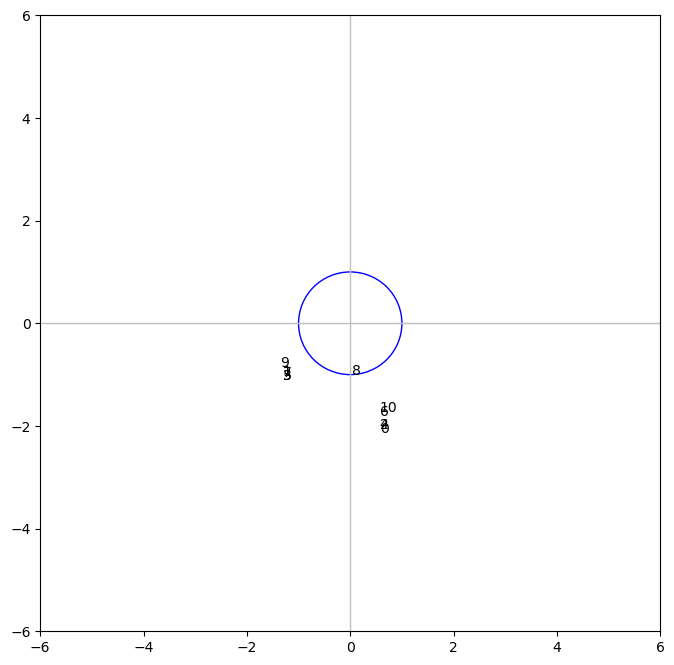

In [41]:
coord = PCA.fit_transform(data_cr)

fig,axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

for j in range(p): 
    plt.annotate(df1.index[j], (coord[j,0],coord[j,1]) )
    
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

circle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(circle)

plt.show()